In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Feature extraction

feature extraction is the process of calculating new features based on the existing ones while trying to lose as little information as possible.

#### Feature selection vs extraction
In Feature selection process some features are dropped completely for the ease of the calculation by considering different aspects of the datasets. 

Feature extraction is different in the sense that it creates new features, which are in fact combinations of the original ones. When you have good understanding of the features in your dataset you can sometimes combine multiple features into a new feature that makes the original ones obsolete.

In [2]:
df = pd.read_csv("grocery_sales.csv")
df.head()

,storeID,product,quantity,revenue
0,A,Apples,1811,9300.6
1,A,Bananas,1003,3375.2
2,A,Oranges,1604,8528.5
3,B,Apples,1785,9181.0
4,B,Bananas,944,3680.2


#### Manual feature extraction

Suppose, You want to compare prices for specific products between stores. In this dataset The quantity and revenue features tell you how many items of a particular product were sold in a store and what the total revenue was. For the purpose of your analysis it's more interesting to know the average price per product. So, now what we have to do is -

1. Calculate the product price from the quantity sold and total revenue.
2. Drop the quantity and revenue features from the dataset.

In [3]:
df["product_price"] = df["revenue"] / df["quantity"]
df.head()

,storeID,product,quantity,revenue,product_price
0,A,Apples,1811,9300.6,5.135616
1,A,Bananas,1003,3375.2,3.365105
2,A,Oranges,1604,8528.5,5.317020
3,B,Apples,1785,9181.0,5.143417
4,B,Bananas,944,3680.2,3.898517


In [4]:
df =df.drop(["revenue", "quantity"], axis=1)
df.head()

,storeID,product,product_price
0,A,Apples,5.135616
1,A,Bananas,3.365105
2,A,Oranges,5.317020
3,B,Apples,5.143417
4,B,Bananas,3.898517


### PCA

PCA creates a new reference system aligned with the variance in the data. Before doing PCA to the dataset we need to Scale the dataset, After standardizing, we can add perpendicular vectors that are aligned with the main directions of variance. We can describe each point in the dataset as a combination of these vectors multiplied with a value each. These values are then called principal components.

You'll now apply PCA on larger ANSUR datasample with 13 dimensions.

In [5]:
ansur_df = pd.read_csv("ans_m_df.csv")
ansur_df.head()

,stature_m,buttockheight,waistdepth,span,waistcircumference,shouldercircumference,footlength,handlength,functionalleglength,chestheight,chestcircumference,cervicaleheight,sittingheight
0,1.776,882,240,1782,933,1151,273,193,1136,1292,1074,1535,928
1,1.702,870,225,1745,870,1119,263,195,1096,1244,1021,1471,884
2,1.735,901,255,1867,964,1276,270,203,1115,1288,1120,1501,917
3,1.655,821,205,1708,857,1155,267,194,1034,1205,1114,1423,903
4,1.914,1080,214,2035,868,1231,305,218,1279,1452,1048,1684,919


In [6]:
ansur_df.shape

(4082, 13)

In [7]:
ansur_df.columns

Index(['stature_m', 'buttockheight', 'waistdepth', 'span',
       'waistcircumference', 'shouldercircumference', 'footlength',
       'handlength', 'functionalleglength', 'chestheight',
       'chestcircumference', 'cervicaleheight', 'sittingheight'],
      dtype='object')

#### Scaling the Data

Before we do PCA, we have to scale the values with the StandardScaler(). PCA can really underperform if you don't do this. We can then create our PCA instance and apply the .fit_transform() method to the scaled data to calculate the two principal components.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [9]:
ansur_std_df = pd.DataFrame(scaler.fit_transform(ansur_df), columns = ansur_df.columns)
ansur_std_df.head()

,stature_m,buttockheight,waistdepth,span,waistcircumference,shouldercircumference,footlength,handlength,functionalleglength,chestheight,chestcircumference,cervicaleheight,sittingheight
0,0.288659,-0.117539,0.064171,-0.379976,-0.067842,-0.433911,0.139047,-0.027933,0.104153,0.015477,0.174945,0.279757,0.272041
1,-0.790965,-0.357956,-0.367753,-0.817215,-0.631892,-0.937225,-0.624254,0.173167,-0.608384,-0.827371,-0.431292,-0.731771,-0.960665
2,-0.309511,0.263122,0.496095,0.624491,0.209707,1.532160,-0.089943,0.977571,-0.269929,-0.054760,0.701113,-0.257617,-0.036135
3,-1.476672,-1.339661,-0.943651,-1.254454,-0.748283,-0.370997,-0.318933,0.072617,-1.712816,-1.512186,0.632482,-1.490418,-0.428360
4,2.302012,3.849351,-0.684497,2.609793,-0.649798,0.824374,2.581610,2.485828,2.651473,2.824973,-0.122455,2.634722,0.019897


We can calculate these principal components for all points in the dataset with sklearn's PCA() class. We can then create our PCA instance and apply the .fit_transform() method to the scaled data to calculate the principal components.

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca_model = PCA()

In [12]:
pca_model.fit(ansur_std_df)

PCA()

#### PCA concept

Most of the time, The first and second principal components explains most of the variances in the data, where the first component is most important as it is aligned with the biggest source of variance in the data.

If we would add a third feature to the original dataset we would also have to add a third principal component if we don't want to lose any information. And this remains true as you keep adding features. You could describe a 100 feature dataset with 100 principal components. 

But why would you want to do such a thing? The components are much harder to understand than the original features.

#### Principal component explained variance ratio

The answer lies in the fact that the components share no duplicate information and that they are ranked from most to least important. We can access the explained variance ratio of each principal component after fitting the algorithm to the data using the .explained_variance_ratio_ attribute. 

In [13]:
pca_model.explained_variance_ratio_

array([0.57832831, 0.2230137 , 0.06404218, 0.04252456, 0.0278581 ,
       0.01761021, 0.01681037, 0.01014147, 0.00706488, 0.00607973,
       0.00344643, 0.00228095, 0.00079911])

#### Plotting the variances of PCA features

Let's see how to plot the variances of the PCA features in practice. Create a range enumerating the PCA features, and make a bar plot of the variances; the variances are available as the explained_variance attribute of the PCA model.

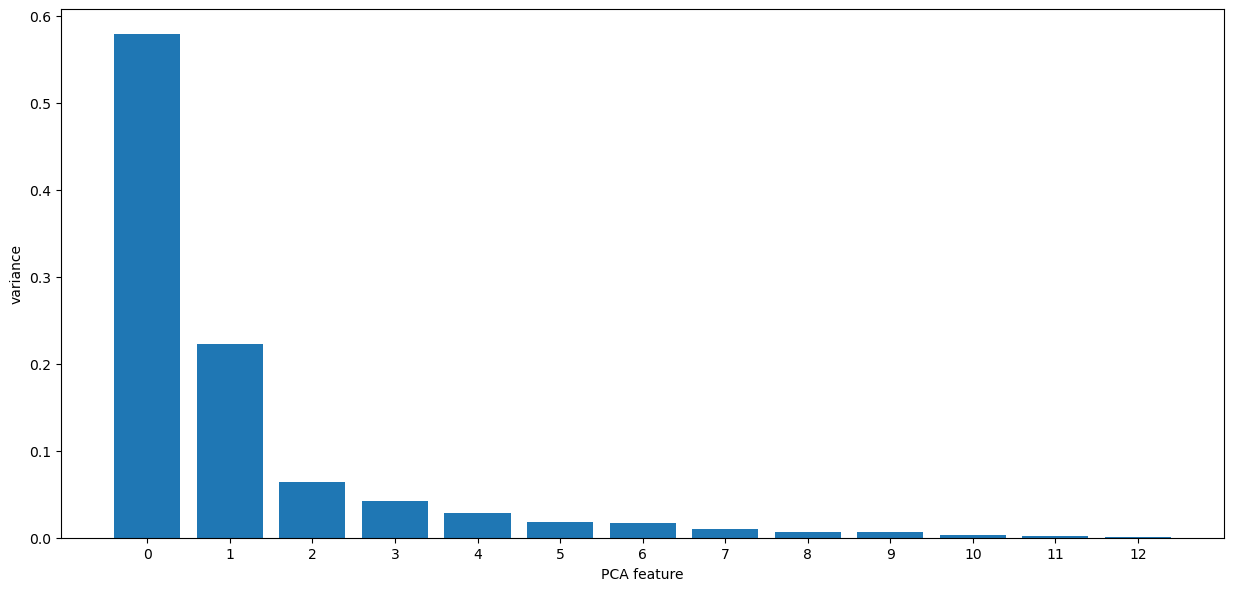

In [15]:
# Plot the explained variances
plt.figure(figsize = (15,7), dpi= 100)
features = range(pca_model.n_components_)
plt.bar(features, pca_model.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

####  PCA for dimensionality reduction

We can use NumPy's cumulative sum method on the .explained_variance_ratio_ attribute to see how much variance we can explain in total by using a certain number of components. 

In [73]:
pca_model.explained_variance_ratio_.cumsum()

array([0.57832831, 0.801342  , 0.86538419, 0.90790875, 0.93576684,
       0.95337706, 0.97018743, 0.9803289 , 0.98739378, 0.99347351,
       0.99691994, 0.99920089, 1.        ])

In this case it tells us that the first components explains 57% of the variance in the data and the second the remaining 22%. 

When you are dealing with a dataset with a lot of correlation the explained variance typically becomes concentrated in the first few components. The remaining components then explain so little variance that they can be dropped. 

we can see taht, Using just the first two components would still allow us to keep 80% of the variance in the data. This is why PCA is so powerful for dimensionality reduction.

Suppose, If we don't want to lose more than 10% of explained variance during dimensionality reduction, then the lowest number of principal components we can keep is 4 principal components. That means, by Using just 4 principal components we can explain more than 90% of the variance in the 13 feature dataset.

#### Creating the PCA dataframe from the Original Dataframe

Now, we'll create a new dataframe by using our first 4 PC's

In [81]:
pc = pca_model.fit_transform(ansur_std_df)

In [82]:
pc[:, 0:4]

array([[-0.10673474, -0.12845724, -0.41084092, -0.01419072],
       [ 2.17443143, -0.39966548,  0.69486635,  0.06888209],
       [-0.80450793,  1.15524016,  0.80817399, -0.70707245],
       ...,
       [ 2.57799085,  1.39645454, -0.47885158,  0.07126971],
       [ 1.77395003, -1.50533624,  0.40344172, -0.19626103],
       [-3.9419875 ,  1.03311698,  1.40711118,  0.96916667]])

In [83]:
four_pc_df = pd.DataFrame(pc[:, 0:4], columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])
four_pc_df.head()

,PC 1,PC 2,PC 3,PC 4
0,-0.106735,-0.128457,-0.410841,-0.014191
1,2.174431,-0.399665,0.694866,0.068882
2,-0.804508,1.155240,0.808174,-0.707072
3,3.276417,0.506931,0.523673,-1.615155
4,-6.913195,-3.109787,1.937470,1.054101


In [84]:
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 
                                  'PC 11', 'PC 12','PC 13'])
pc_df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13
0,-0.106735,-0.128457,-0.410841,-0.014191,0.394098,-0.253546,-0.084907,0.269305,-0.234441,-0.059134,-0.161303,-0.267887,-0.011829
1,2.174431,-0.399665,0.694866,0.068882,0.418598,0.287322,0.109741,0.484254,-0.101049,-0.146606,-0.074437,-0.189415,0.018401
2,-0.804508,1.155240,0.808174,-0.707072,-0.778371,0.803188,0.436320,0.078966,0.312247,-0.036709,0.326122,-0.008462,0.060673
3,3.276417,0.506931,0.523673,-1.615155,-0.192054,-0.087298,0.290449,0.645270,-0.709699,-0.565111,0.118403,-0.073932,0.081627
4,-6.913195,-3.109787,1.937470,1.054101,-0.503498,-0.315324,0.716835,0.279637,0.118597,-0.034145,-0.085350,0.058882,0.105834


In [85]:
pc.shape

(4082, 13)